# Основы визуализации данных с помощью Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык визуализации данных с помощью простых графиков matplotlib. Научиться использовать визуализацию данных для проверки гипотез и валидации данных

### Описание домашнего задания и формат сдачи

Вам предстоит выполнить задачи по визуализации данных. Для этого  впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку преподавателю.

**Важно учесть:** У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Критерии оценки

**"Зачет"** - выполнены задачи 1-9, каждый график отформатирован и читаем

**"На доработку"** - выполнены не все обязательные задачи или какой-либо из график не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Загрузка данных

In [123]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте гистограмму распределения объема продаж всех игр в Японии

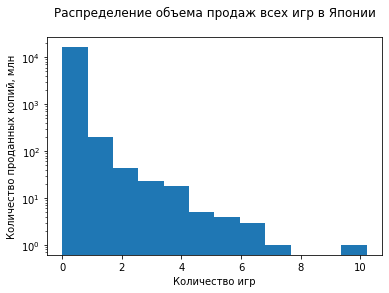

In [286]:
jp_serie = df['JP_Sales']
plt.hist(jp_serie, bins=12)
plt.yscale('log')
plt.title('Распределение объема продаж всех игр в Японии\n')
plt.xlabel('Количество игр')
plt.ylabel('Количество проданных копий, млн');


### Задача 2

Постройте столбчатую диаграмму (barchart), показывающую сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах

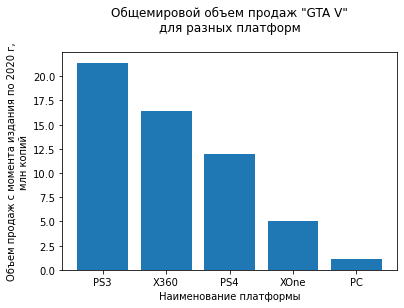

In [148]:
df1 = df[df['Name'] == 'Grand Theft Auto V'].set_index('Platform')['Global_Sales'].reset_index()
plt.bar(df1['Platform'], df1['Global_Sales'])
plt.title('Общемировой объем продаж "GTA V"\nдля разных платформ\n')
plt.xlabel('Наименование платформы')
plt.ylabel('Объем продаж с момента издания по 2020 г,\nмлн копий');

### Задача 3

Постройте линейный график динамики суммарных общемировых продаж всех игр по годам

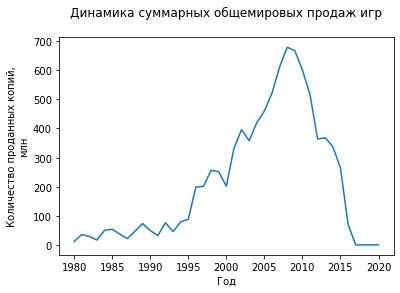

In [155]:
gs_serie = df.groupby('Year')['Global_Sales'].sum()
plt.plot(gs_serie)
plt.title('Динамика суммарных общемировых продаж игр\n')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий,\nмлн');

### Задача 4

Постройте точечную диаграмму, показывающую существование зависимости продаж во всем мире от продаж в Северной Америке

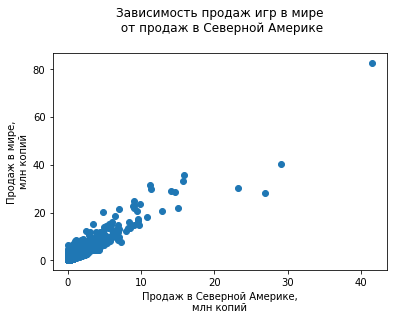

In [166]:
plt.scatter(df['NA_Sales'], df['Global_Sales'])
plt.title('Зависимость продаж игр в мире\n от продаж в Северной Америке\n')
plt.xlabel('Продаж в Северной Америке,\nмлн копий')
plt.ylabel('Продаж в мире,\nмлн копий');


### Задача 5

Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой.

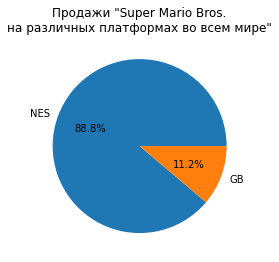

In [173]:
smb_serie = df[df['Name'] == 'Super Mario Bros.'].set_index('Platform')['Global_Sales']
plt.pie(smb_serie, labels=smb_serie.index, autopct='%1.1f%%')
plt.title('Продажи "Super Mario Bros.\nна различных платформах во всем мире"');

### Задача 6

Определите 5 издателей, имеющих наибольшие суммарные продажи во всем мире в 2013 году и проиллюстрируйте величину их продаж на столбчатой гистограмме

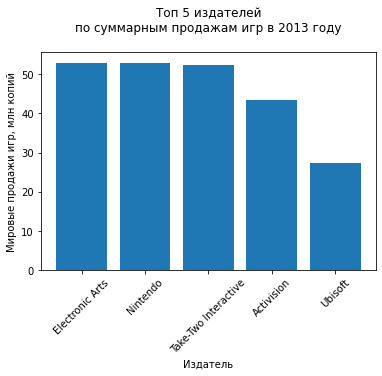

In [191]:
top_5 = df[df['Year'] == 2013].groupby('Publisher')\
['Global_Sales'].sum().reset_index().sort_values('Global_Sales', ascending=False).head(5)

plt.bar(top_5['Publisher'], top_5['Global_Sales'])
plt.xticks(rotation=45)
plt.title('Топ 5 издателей\nпо суммарным продажам игр в 2013 году\n')
plt.xlabel('Издатель')
plt.ylabel('Мировые продажи игр, млн копий');

### Задача 7

Постройте гистограмму распределения величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно. Гистограмма для большей точности должна содержать 20 столбцов, отсечки на оси X должны соответствовать границам столбцов.

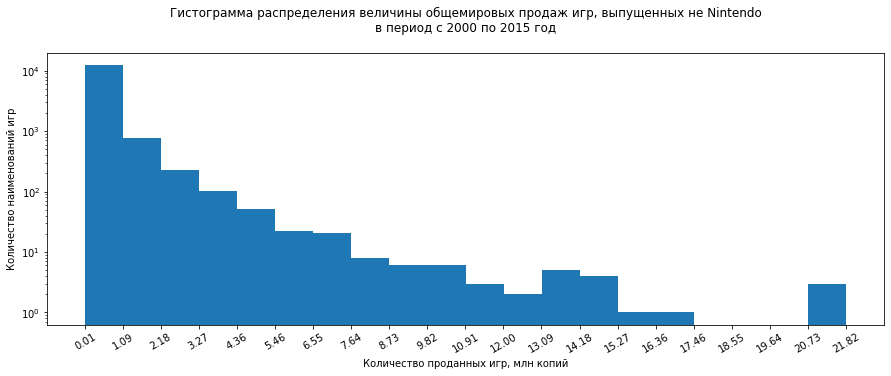

In [278]:
n_df = df[(df['Publisher'] != 'Nintendo') & (df['Year'] <= 2015) & (df['Year'] >= 2000)]['Global_Sales']
plt.figure(figsize=(15, 5))
plt.hist(n_df, bins=20)
bin_width = n_df.max() / 20
x_range = [n_df.min()]
x_range.extend([i * bin_width for i in range(1, 21)])
plt.yscale('log')
plt.xticks(x_range, rotation=30)
plt.title('Гистограмма распределения величины общемировых продаж игр, выпущенных не Nintendo\n'
            'в период с 2000 по 2015 год\n')
plt.xlabel('Количество проданных игр, млн копий')
plt.ylabel('Количество наименований игр');

### Задача 8

Постройте линейный график динамики суммарных мировых продаж игр жанра "Action" по годам

Text(0, 0.5, 'Количество проданных копий, млн')

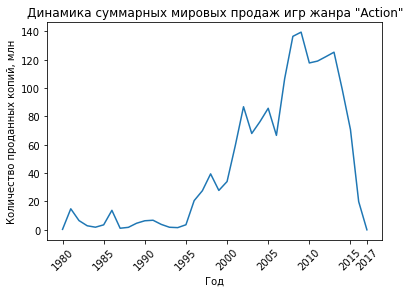

In [299]:
act = df[df['Genre'] == 'Action'].groupby('Year')['Global_Sales'].sum()
plt.plot(act)
x_range = list(range(int(act.index.min()), int(act.index.max()) + 1, 5))
x_range.append(int(act.index.max()))
plt.xticks(x_range, rotation=45)
plt.title('Динамика суммарных мировых продаж игр жанра "Action"')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий, млн')

### Задача 9

С помощью столбчатой диаграммы проиллюстрируйте объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра. Столбцы расположите по убыванию.

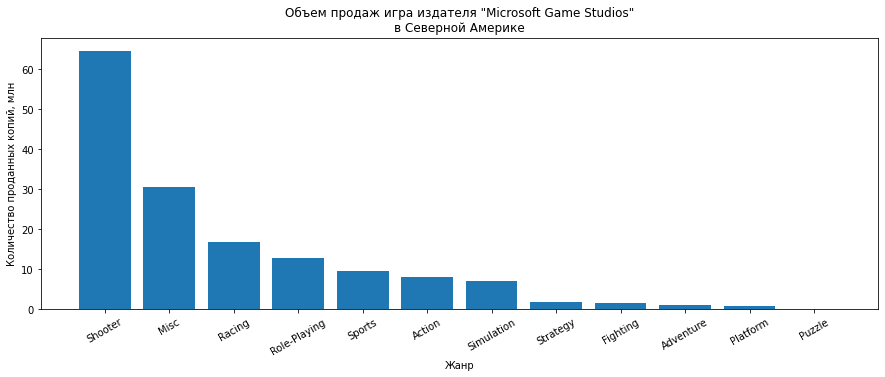

In [312]:
mgs = df[(df['Publisher'] == 'Microsoft Game Studios')].groupby('Genre')['NA_Sales']\
                                                    .sum().reset_index().sort_values('NA_Sales', ascending=False)
plt.figure(figsize=(15,5))
plt.bar(mgs['Genre'], mgs['NA_Sales'])
plt.xticks(rotation=30)
plt.title('Объем продаж игра издателя "Microsoft Game Studios"\n'
             'в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн');

## Дополнительные (необязательные) задачи

### Задача 10

Одной из основных задач при анализе данных является проверка данных на корректность и отсутствие ошибок. В датасете "vgsales" одним из потенциальных источников ошибок является столбец с общемировыми продажами. По идее, значение общемировых продаж какой-либо игры должно равняться сумме продаж в Северной Америке, Европе, Японии и остальных странах, в противном случае мы получим ошибку в данных, которая может негативно повлиять на весь дальнейший процесс анализа.

Причин возникновения такой ошибки может быть несколько. Давайте рассмотрим следующие причины:
1. Ошибка округления. В целом, такая ошибка достаточно часто встречается при переводе величин из одних единиц в другие (например, из тысяч копий в миллионы копий).
1. Ошибка вычислений. Такая ситуация требует более серьезного исследования, поскольку она может привести к недостоверным результатам анализа данных.

Будем считать, что в записи имеется ошибка суммирования, если сумма продаж какой-либо игры в Северной Америке, Европе, Японии и остальных странах отличается от общемировых продаж более, чем на 0.01 млн копий.

С помощью круговой диаграммы проиллюстрируйте процент записей в датасете, имеющих такую ошибку суммирования продаж.

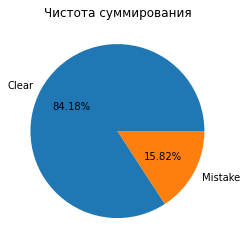

In [354]:
diff = lambda x: 1 if abs(sum(x['NA_Sales':'Other_Sales']) - x['Global_Sales']) > 0.01 else 0
df['isMistake'] = df.apply(diff, axis=1)
df['isMistakeStr'] = np.where(df['isMistake'] == 1, 'Mistake', 'Clear')
new_df = df.groupby('isMistakeStr')['isMistake'].sum()
new_df['Clear'] = df.shape[0] - new_df['Mistake']
plt.pie(new_df, labels=new_df.index, autopct='%1.2f%%')
plt.title('Чистота суммирования');